# 칼만필터

## 칼만필터의 전체 계산과정

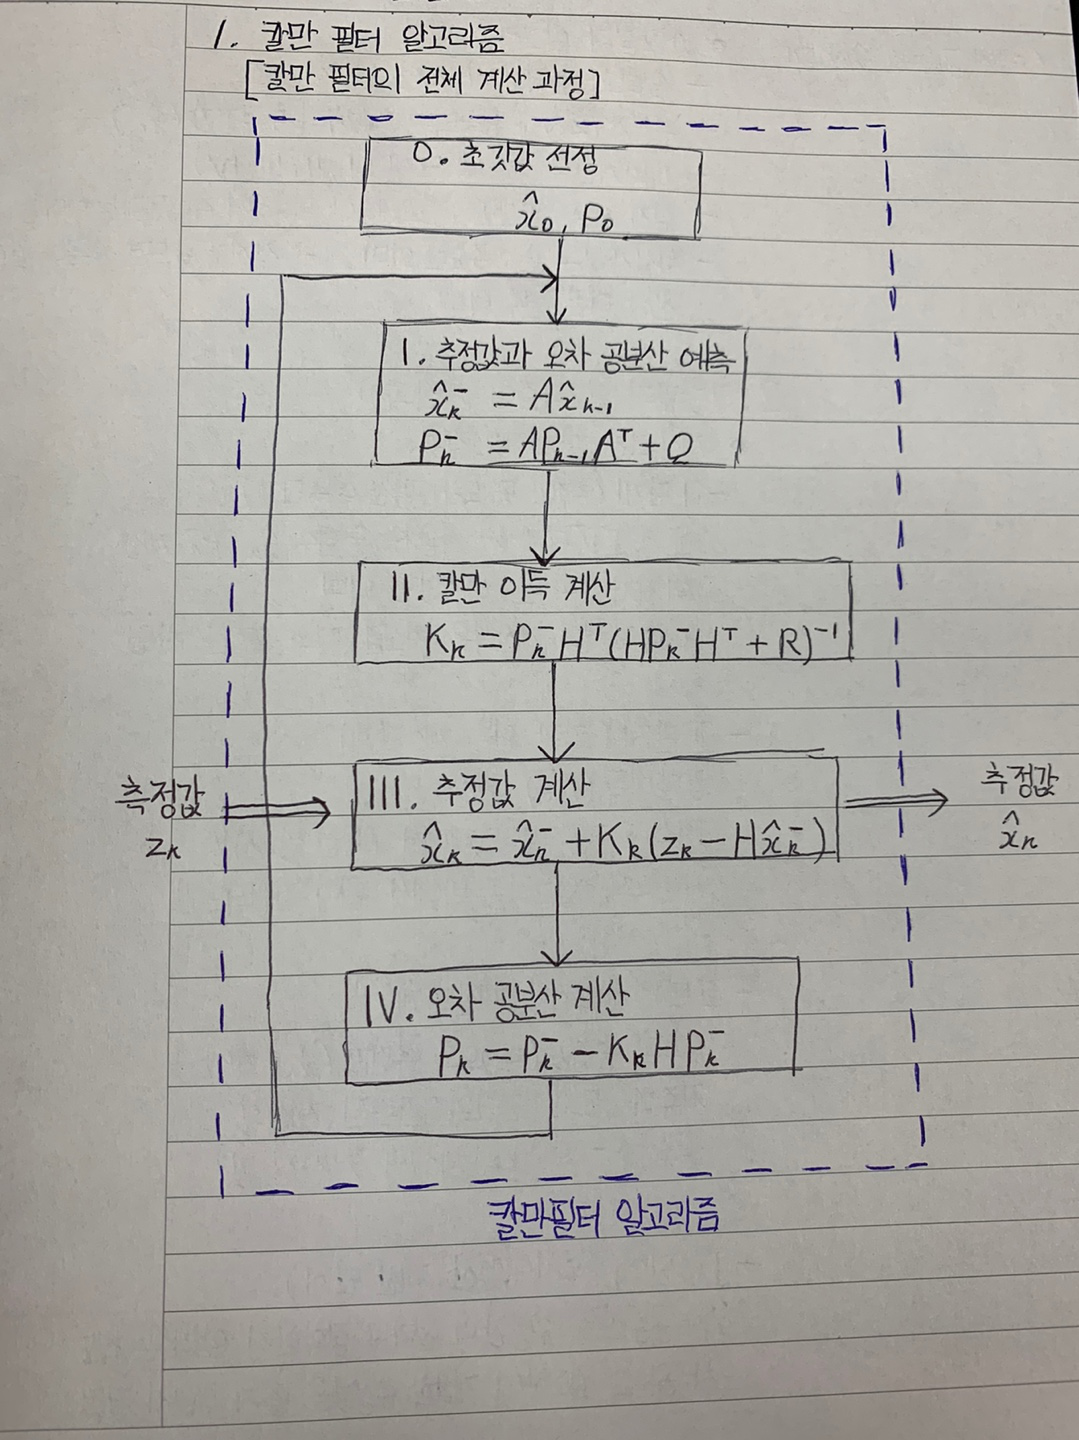

In [8]:
from PIL import Image
Image.open('./data/img/kalman2.jpeg')

### 칼만필터 알고리즘 구조
- 입력과 출력이 하나씩인 간단한 구조
- 측정값(zk)이 입력되면 내부처리 후 추정값 (x hat k) 출력
- 내부계산은 총 네 단계
- 아래첨자 k는 칼만필터 알고리즘이 반복해서 수행된다는 의미
- 위첨자 '-'는 중요한 의미, '-'첨자가 붙으면 이름이 같아도 전혀 다른 변수를 의미


## 칼만 필터 알고리즘의 계산과정

### 계산과정 단계별 설명

- 1단계 (추정값 및 오차 공분산 예측단계)
    - 2 ~ 4단계에서 사용하는 두 변수 x hat k, P-k 계산
    - 위 첨자 '-'는 예측값을 의미
    - 예측단계의 계산식은 시스템모델과 밀접한 관련
    
- 2단계 (칼만이득 계산단계)
    - 칼만이득(Kk) 계산
    - 변수 P-k는 앞 단계에서 계산한 값 사용
    - H, R은 알고리즘 밖에서 미리 결정되는 값
    
- 3단계 (추정값 계산단계)
    - 입력된 측정값(zk)으로 추정값(x hat k) 계산
    - 저주파 통과 필터와 관련된 계산식
    - 변수 x hat - k는 1단계에서 계산한 값
    
- 4단계 (오차 공분산 계산 단계)
    - 오차 공분산은 추정값이 얼마나 정확한지 알려주는 척도
    - 오차 공분산 검토하여 계산한 추정값을 쓸지 버릴지 결정
    
### 알고리즘에 등장하는 변수
- 외부입력 : zk(측정값)
- 최종출력 : x hat k (추정값)
- 시스템 모델 : A, H, Q, R
- 내부 계산용 : x hat - k, P hat - k, Pk, Kk

    - A, H, Q, R은 구현 전에 미리 결정
    - 대상 시스템과 칼만필터 사용목적에 따라 설계자가 사전에 확정
    - 이 값을 어떻게 선정하느냐에 따라 칼만필터의 성능이 달라짐
    - 칼만필터의 성능은 시스템 모델이 실제 시스템과 가까울수록 좋음
    
### 칼만필터 알고리즘 의미 별 분류 (예측과정과 추정과정)

- 예측과정
    - 1단계가 여기에 해당
    - 직전 추정값(x hat k-1)과 오차공분산(Pk-1)이 입력되면 최종결과로 예측값(x hat - k, P - k)을 출력
    - 예측값은 추정과정에 사용
    - 해당 단계에서 사용하는 시스템 모델 변수는 A와 Q
    
- 추정과정
    - 2 ~ 4단계가 여기에 해당
    - 추정과정의 결과물은 추정값(x hat k)과 오차공분산(Pk)
    - 입력값은 예측과정의 예측값과 측정값(zk) 사용
    - 사용하는 시스템 모델 변수는 H와 R
    
### 정리 (의미 분류 관점으로)
1. 시스템 모델(A, Q)을 기초로 다음 시각에 상태와 오차 공분산 예측 (x hat - k, P - k)
2. 측정값과 예측값의 차이를 보정하여 새로운 추정값 계산 (x hat k, Pk)
    - 칼만필터의 최종결과물
3. 위의 두 과정 반복